
## 74 - Pilot Reports Pt.3


[Youtube](https://www.youtube.com/watch?v=4B00Ed_m22g)

In [1]:
import urllib
from bs4 import BeautifulSoup

In [2]:
def parse_report(report_html):
	report = {}
	report_rows = report_html.find_all('tr')
	for row in report_rows:
		row = row.get_text().strip().split(':')
		
		# If this is the location field, split it apart
		if row[0] == 'Location':
			location = row[1].split(',')
			report.update({'Latitude': float(location[0].replace(' latitude', ''))})
			report.update({'Longitude': float(location[1].replace(' longitude', ''))})
			
		else:
			report.update({row[0]: row[1]})

	return report

In [3]:
data_url = 'https://www.aviationweather.gov/airep/data?id=&distance=200&format=decoded&type=&age=1.5&layout=on&date='

In [4]:
req = urllib.request.urlopen(data_url)
html_doc = req.read()
html_doc = html_doc.decode('utf8')
req.close()

In [5]:
soup = BeautifulSoup(html_doc, 'html.parser')
table_data = soup.find_all('table')

In [6]:
reports = [parse_report(report) for report in table_data]

In [7]:
for report in reports:
	if report.get('Turbulence'):
		print(report['Turbulence'])

Negative
Continuous Light Chop
Light to Moderate Chop
Moderate
Negative
Negative
Light to Moderate
Negative
Continuous Light
Negative
Occasional Light Chop
Light to Moderate Chop
Negative
Negative
Negative
Light to Moderate
Light
Light
Negative
Negative
Light
Negative
Light
Negative
Moderate
Continuous Moderate
Continuous Light
Moderate
Occasional Moderate Chop
Continuous Light
Continuous Light Chop
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Negative
Moderate Chop
Negative
Negative
Negative
Negative
Light Chop
Negative
Negative
Moderate
Occasional Light
Light to Moderate
Negative
Negative
Continuous Light Chop
Moderate
Continuous Light Chop
Moderate Chop
Continuous Light
Negative
Negative
Negative
Negative
Occasional Moderate
Negative
Continuous Light Chop
Negative
Light
Negative
Light Clear Air
Light
Negative
Light
Light
Continuous Moderate Chop
Occasional Light Chop
Light to Moderate
Continuous Light Chop
Negative
Moderate
Continuous Light Chop
Continuous

In [8]:
lats = []
lons = []
sevs = []

In [9]:
for report in reports:
	if report.get('Turbulence'):
		lats.append(report.get('Latitude'))
		lons.append(report.get('Longitude'))
		
		# Parse the turbulences string
		turbulence = report.get('Turbulence').lower()
		
		if 'severe' in turbulence:
			sevs.append(3)
		elif 'moderate' in turbulence:
			sevs.append(2)
		elif 'light' in turbulence:
			sevs.append(1)
		else:
			sevs.append(0)

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

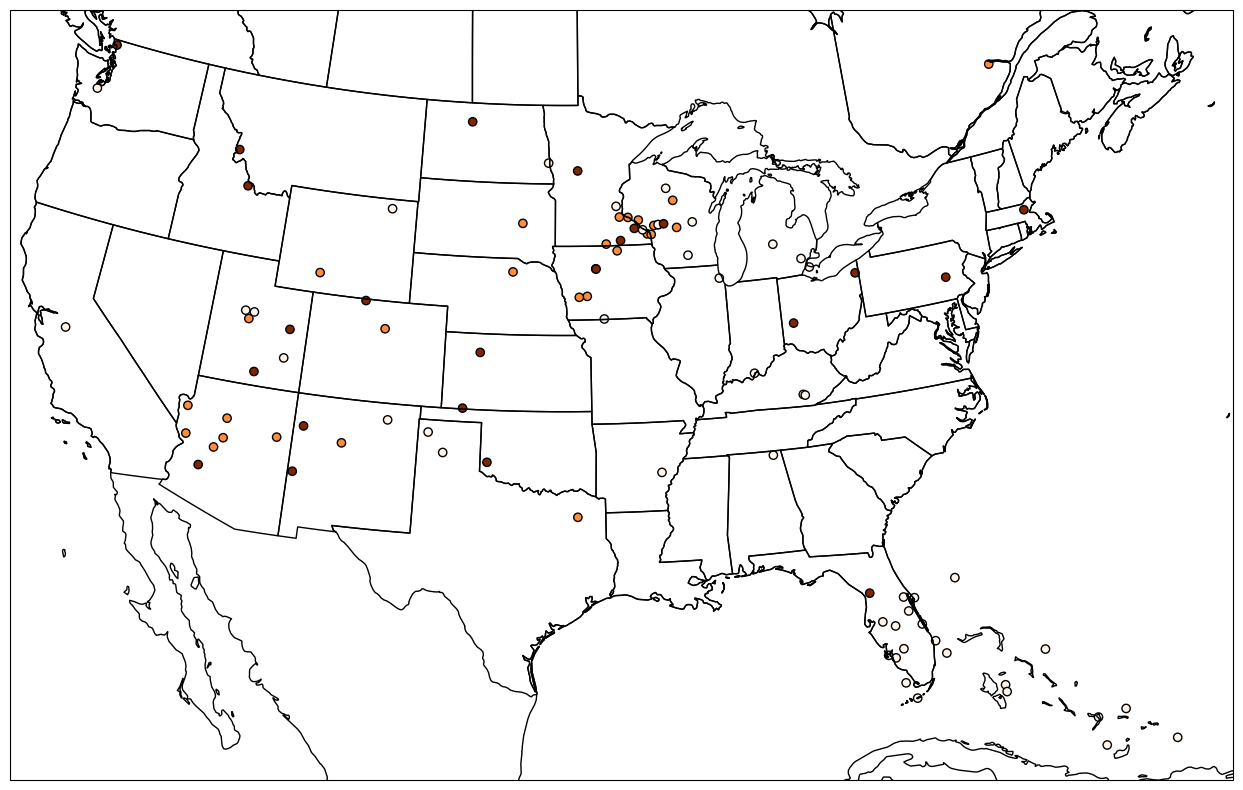

In [11]:
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(1, 1, 1, projection = ccrs.LambertConformal())
ax.scatter(lons, lats, c = sevs, cmap = 'Oranges', edgecolor = 'k', transform = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)